# Glider data worflow from raw

****

## Change the working directory and move some files
There is a deployment yml metadata file template and a sensor txt list template that will be copied in the glider raw data directory and that need to be manually filled in.

In [1]:
#Simply change the working directory to the project directory

import os
import shutil

current_dir = os.getcwd()
parent_parent_dir = os.path.dirname(current_dir)
os.chdir(parent_parent_dir)

# Now the working directory is set to the project directory
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\flapet\OneDrive - NOC\Documents\IDAPro\lib\db_building


****

## Creation of the yaml file for metadata

In [ ]:
# #copy the deployment yaml file templte to my raw glider folder
# source_file = 'data/glider/raw/deployment.yml'

# destination_dir = 'data/glider/pomBODCREQ-5915/unit_345/deployment_345.yml'
# shutil.copy(source_file, destination_dir)
# destination_dir = 'data/glider/pomBODCREQ-5915/unit_397/deployment_397.yml'
# shutil.copy(source_file, destination_dir)
# destination_dir = 'data/glider/pomBODCREQ-5915/unit_398/deployment_398.yml'
# shutil.copy(source_file, destination_dir)
# destination_dir = 'data/glider/pomBODCREQ-5915/unit_405/deployment_405.yml'
# shutil.copy(source_file, destination_dir)

**Open the yaml file and edit it manually with metadat from the glider deployment**

****

## Edition of sensors filter list

In [ ]:
#Copy the sensor list template
source_file = 'data/glider/filipa_txt/biocarbon_glider_standard_sensors.txt'
destination_dir = 'data/glider/pomBODCREQ-5915/unit_345/sensors_template.txt'

shutil.copy(source_file, destination_dir)

**Open the txt file and modify it maunaully**

****

## Moving EBD and DBD into the same folder

It's chat gpt code

In [2]:
# Function to copy files with a specific extension
def copy_files_with_extension(source_dir, extension, dest_dir):
    if not os.path.isdir(dest_dir):
        os.mkdir(dest_dir)
    for file_name in tqdm(os.listdir(source_dir)):
        if file_name.endswith(extension):
            full_file_path = os.path.join(source_dir, file_name)
            if os.path.isfile(full_file_path):
                shutil.copy(full_file_path, dest_dir)

In [ ]:
from tqdm import tqdm
# Define source directories for .EBD and .DBD files
source_dir_ebd = [
    "data/glider/pomBODCREQ-5915/unit_345/SB/LOGS",
    "data/glider/pomBODCREQ-5915/unit_397/SB/LOGS",
    "data/glider/pomBODCREQ-5915/unit_398/SB/LOGS",
    "data/glider/pomBODCREQ-5915/unit_405/SB/LOGS"]
source_dir_dbd = [
    "data/glider/pomBODCREQ-5915/unit_345/MB/LOGS",
    "data/glider/pomBODCREQ-5915/unit_397/MB/LOGS",
    "data/glider/pomBODCREQ-5915/unit_398/MB/LOGS",
    "data/glider/pomBODCREQ-5915/unit_405/MB/LOGS"]

# Define the destination directory
destination_dir = [
    "data/glider/pomBODCREQ-5915/unit_345/pyglider_binaries",
    "data/glider/pomBODCREQ-5915/unit_397/pyglider_binaries",
    "data/glider/pomBODCREQ-5915/unit_398/pyglider_binaries",
    "data/glider/pomBODCREQ-5915/unit_405/pyglider_binaries"]


# Ensure the destination directory exists
for dir in destination_dir:
    os.makedirs(dir, exist_ok=True)

# Copy .EBD files
for file, dest in zip(source_dir_ebd, destination_dir):
    copy_files_with_extension(file, ".EBD", dest)

# Copy .DBD files
for file, dest in zip(source_dir_dbd, destination_dir):
    copy_files_with_extension(file, ".DBD", dest)


In [ ]:
gliders_numb = ["345", "397", "398", "405"]

for numb in gliders_numb:
    dest = f"data/glider/pomBODCREQ-5915/unit_{numb}/pyglider_binaries/cac/"
    cac_nav = f'data/glider/pomBODCREQ-5915/unit_{numb}/BODC_listings/nav/cache'
    copy_files_with_extension(cac_nav, "", dest)

    cac_sci = f"data/glider/pomBODCREQ-5915/unit_{numb}/BODC_listings/sci/cache"
    copy_files_with_extension(cac_sci, "", dest)


print("All files copied successfully.")



## Try to run process_deploymentRealtime

INFO:pyglider.slocum:data/glider/pomBODCREQ-5915/unit_397/pyglider_binaries/*.[D|E]BD
INFO:pyglider.slocum:working on latitude
INFO:pyglider.slocum:names: latitude m_lat
INFO:pyglider.slocum:working on longitude
INFO:pyglider.slocum:names: longitude m_lon
INFO:pyglider.slocum:working on heading
INFO:pyglider.slocum:names: heading m_heading
INFO:pyglider.slocum:working on pitch
INFO:pyglider.slocum:names: pitch m_pitch
INFO:pyglider.slocum:working on roll
INFO:pyglider.slocum:names: roll m_roll
INFO:pyglider.slocum:working on waypoint_latitude
INFO:pyglider.slocum:names: waypoint_latitude c_wpt_lat
INFO:pyglider.slocum:working on waypoint_longitude
INFO:pyglider.slocum:names: waypoint_longitude c_wpt_lon
INFO:pyglider.slocum:working on conductivity
INFO:pyglider.slocum:names: conductivity sci_water_cond
INFO:pyglider.slocum:working on temperature
INFO:pyglider.slocum:names: temperature sci_water_temp
INFO:pyglider.slocum:working on pressure
INFO:pyglider.slocum:names: pressure sci_water

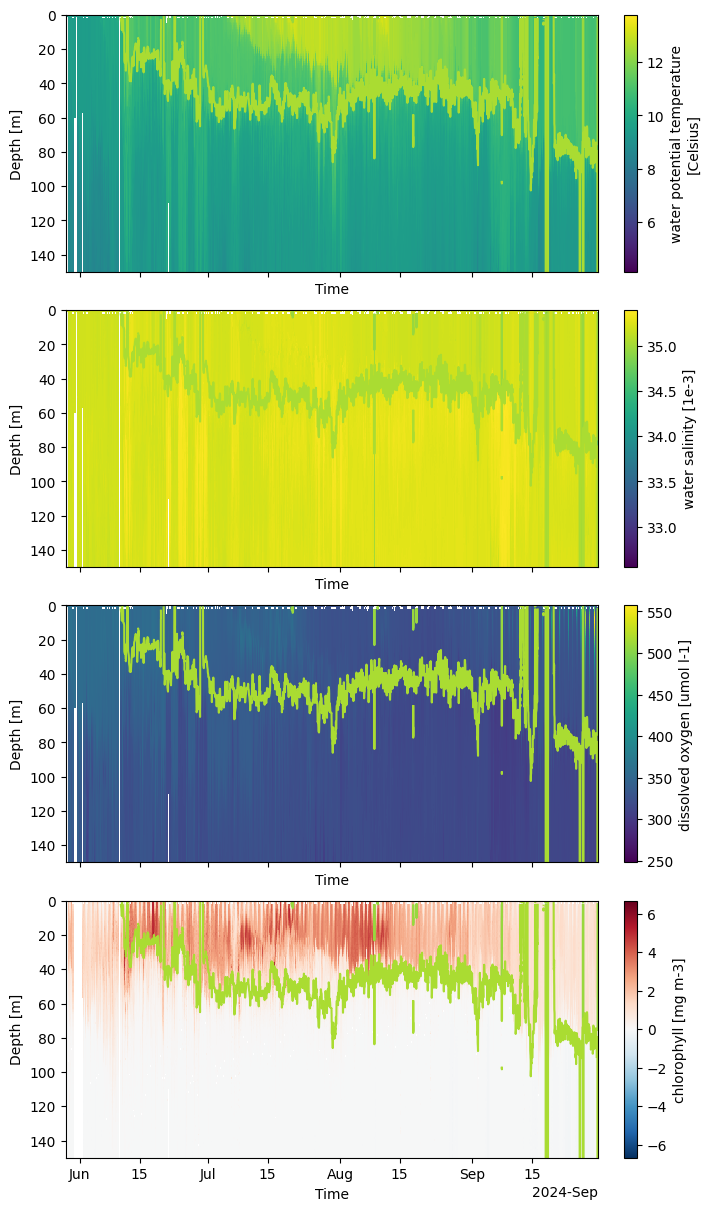

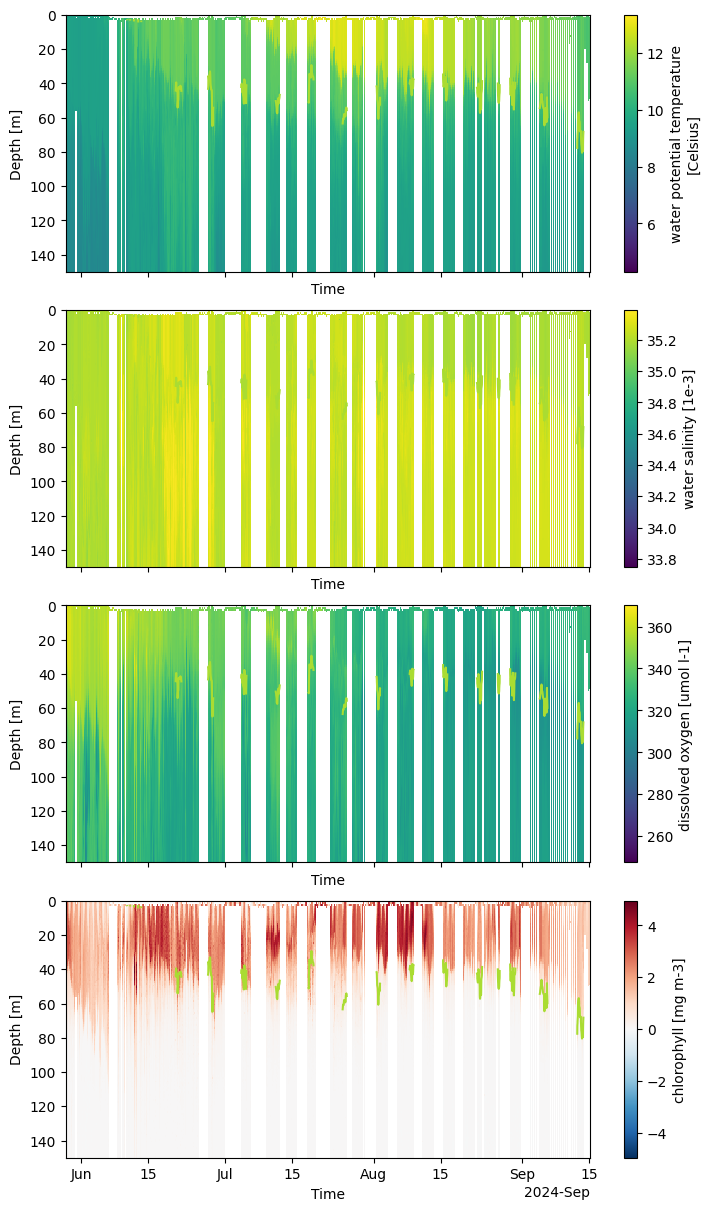

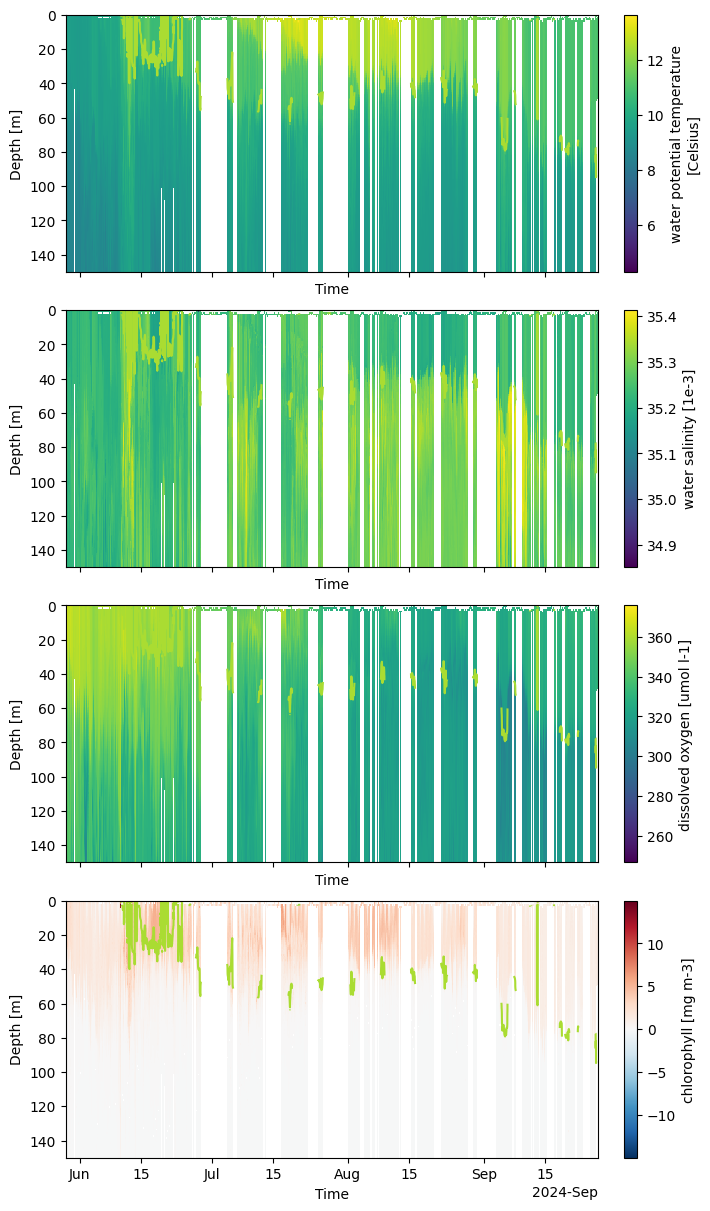

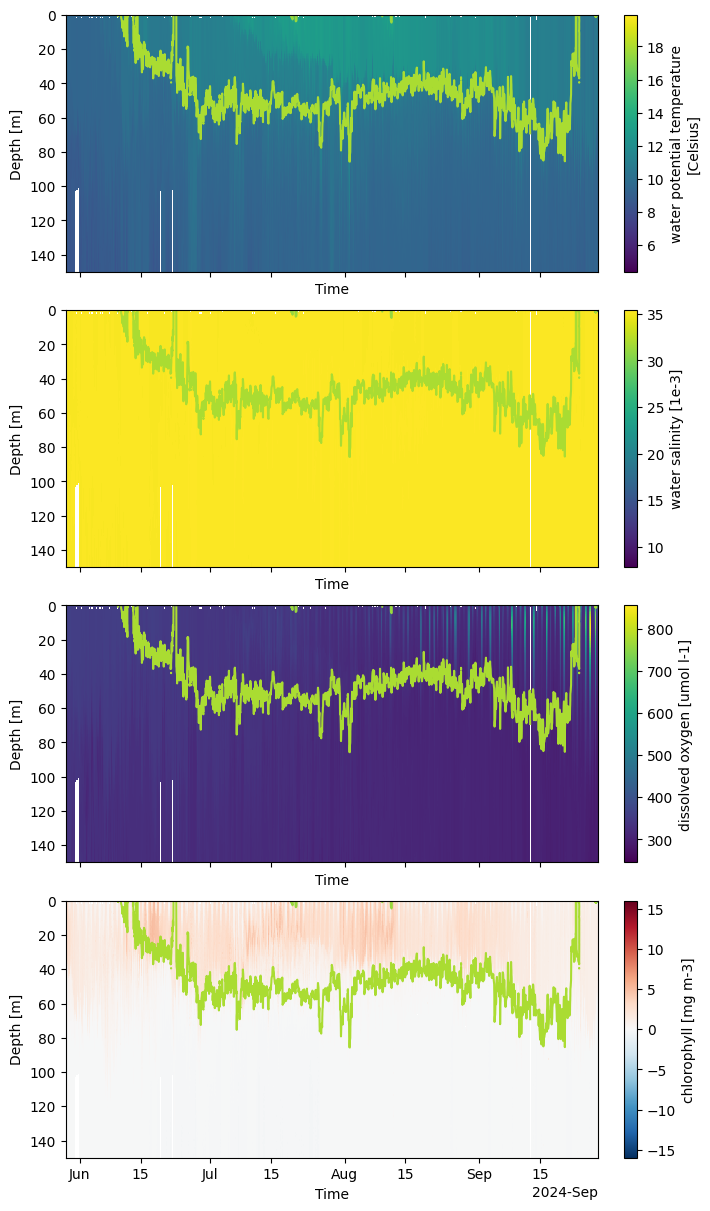

In [4]:
import logging
import pyglider.ncprocess as ncprocess
import pyglider.slocum as slocum
import pyglider.utils as pgutils
import dbdreader

logging.basicConfig(level='INFO')

glider_number = ['397', '398', '345', '405']

for numb in glider_number:
    binarydir = f'data/glider/pomBODCREQ-5915/unit_{numb}/pyglider_binaries'
    ncdir = f'data/glider/pomBODCREQ-5915/unit_{numb}/nc_files/'
    cacdir = f'data/glider/pomBODCREQ-5915/unit_{numb}/pyglider_binaries/cac/'
    sensorlist = f'data/glider/filipa_txt/full_list.txt'
    deploymentyaml = f'data/glider/pomBODCREQ-5915/unit_{numb}/deployment_{numb}.yml'
    l1tsdir = ncdir + 'L0-timeseries/'
    profiledir = ncdir + 'L0-profiles/'
    griddir = ncdir + 'L0-gridfiles/'
    scisuffix = 'ebd'
    glidersuffix = 'dbd'
    rawdir = f'data/glider/pomBODCREQ-5915/unit_{numb}/rawnc/'

    do_direct = True

    # only do this for a real run, or something like this
    real = False
    if real:
        os.system('rsync -av cproof@sfmc.webbresearch.com:/var/opt/sfmc-dockserver/' +
                'stations/dfo/gliders/ ~/gliderdata/slocum_dockserver/')
        os.system('rsync -av ~/gliderdata/slocum_dockserver/rosie_713/from-glider/* ' +
                binarydir)

        os.system('rm ' + rawdir + 'dfo* ' + rawdir + 'TEMP*.nc ' + l1tsdir + '* ' +
                profiledir + '* ' + griddir + '* ')

    if do_direct:
        # turn *.sdb and *.tbd into timeseries netcdf files
        outname = slocum.binary_to_timeseries(
            binarydir, cacdir, l1tsdir, deploymentyaml, search='*.[D|E]BD',
            profile_filt_time=20, profile_min_time=20)
    else:
        # turn *.EBD and *.DBD into *.ebd.nc and *.dbd.nc netcdf files.
        slocum.binary_to_rawnc(
            binarydir, rawdir, cacdir, sensorlist, deploymentyaml,
            incremental=True, scisuffix=scisuffix, glidersuffix=glidersuffix)

        # merge individual neetcdf files into single netcdf files *.ebd.nc and *.dbd.nc
        slocum.merge_rawnc(
            rawdir, rawdir, deploymentyaml,
            scisuffix=scisuffix, glidersuffix=glidersuffix)

        # Make level-1 timeseries netcdf file from th raw files...
        outname = slocum.raw_to_timeseries(
            rawdir, l1tsdir, deploymentyaml,
            profile_filt_time=100, profile_min_time=300)

    if False:
        # make profile netcdf files for ioos gdac...
        ncprocess.extract_timeseries_profiles(outname, profiledir, deploymentyaml)

    # make grid of dataset....

    outname2 = ncprocess.make_gridfiles(outname, griddir, deploymentyaml)
    pgutils.example_gridplot(outname2, './gridplot2.png', ylim=[150, 0],
                            toplot=['potential_temperature', 'salinity',
                                    'oxygen_concentration', 'chlorophyll'])

In [ ]:
import xarray as xr

In [ ]:
dat = xr.open_dataset('data/glider/pomBODCREQ-5915/unit_345/nc_files/L0-timeseries/dfo-maria997-20220614.nc')

In [ ]:
display(dat)

In [ ]:
grouped_dat = dat.groupby('profile_index')

In [ ]:
grouped_dat[165]['CH']

In [ ]:
chl = grouped_dat[900]['chlorophyll'].values
pres = grouped_dat[900]['pressure'].values
time = grouped_dat[900].time
import matplotlib.pyplot as plt
#chl = interp_nan(chl)
#pres = interp_nan(pres)

#Simple plot
plt.plot(time, -pres)
plt.show() 